<a href="https://colab.research.google.com/github/jlopez-i/DataScience/blob/main/M3_Estadistica_para_cient%C3%ADficos_de_datos_Caso_Practico_Final_Evaluable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M3.Estadistica para científicos de datos - Caso Práctico Final Evaluable
**Tomaremos el dataset Salaries.csv**

El conjunto de datos consiste en los salarios de nueve meses recogidos de 397 profesores universitarios en los EE.UU. durante 2008 y 2009. Además de los salarios, también se recogió el rango del profesor, el sexo, la disciplina, los años desde el doctorado y los años de servicio. Así, hay un total de 6 variables, que se describen a continuación.

  1. **rank**: Categórica - de profesor asistente, profesor asociado o catedrático
  2. **discipline**: Categórica - Tipo de departamento en el que trabaja el profesor, ya sea aplicado (B) o teórico (A)
  3. **yrs.since.phd**: Continuo - Número de años desde que el profesor obtuvo su doctorado
  4. **yrs.service**: Continuo - Número de años que el profesor ha prestado servicio al departamento y/o a la universidad
  5. **sex**: Categórico - Sexo del profesor, hombre o mujer
  6. **salary**: Continuo - Sueldo de nueve meses del profesor (USD)

El objetivo de esta práctica consiste en realizar un estudio íntegro del dataset para terminar implementando un **modelo lineal regularizado que realice predicciones sobre el salario a percibir de un profesor**. Asimismo, se pedirá aprovechar la explicabilidad de estos modelos y los estudios estadísticos realizados para arrojar intuiciones y dependencias en los datos.

Para ello, se pide al estudiante que realice los siguientes pasos:

1. Carga los datos. Realiza una inspección por variables de la distribución de salarios en función de cada atributo visualmente. Realiza las observaciones pertinentes. ¿Qué variables son mejores para separar los datos?
2. ¿Podemos emplear un test paramétrico para determinar si las medias de salarios entre hombres y mujeres son las mismas o difieren? Ten en cuenta que, en tanto que se pide usar un test paramétrico, se deberá determinar si las muestras cumplen con las hipótesis necesarias.
3. Divide el dataset tomando las primeras 317 instancias como train y las últimas 80 como test. Entrena un modelo de regresión lineal con regularización Ridge y Lasso en train seleccionando el que mejor MSE tenga. Da las métricas en test. Valora el uso del One Hot Encoder, en caso de emplearlo arguméntalo.
4. Estudia la normalidad de los residuos del modelo resultante, ¿detectas algún sesgo?
5. ¿Qué conclusiones extraes de este estudio y del modelo implementado? ¿Consideras correcto el rendimiento del mismo?

***NOTA: La resolución debe ser en R***

#**Resolución**

##1. Carga los datos. Realiza una inspección por variables de la distribución de salarios en función de cada atributo visualmente. Realiza las observaciones pertinentes. ¿Qué variables son mejores para separar los datos?

### Carga de datos y primeras observaciones

In [141]:
# Cargar los datos
salaries <- read.csv("Salaries.csv")

# Observacion tipo de dato y registros de cada campo
str(salaries)

'data.frame':	397 obs. of  7 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ rank         : chr  "Prof" "Prof" "AsstProf" "Prof" ...
 $ discipline   : chr  "B" "B" "B" "B" ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


In [142]:
# Dimensiones del dataset
dim(salaries)

[1] 397   7

In [143]:
# Observación de los primeros registros del dataset
head(salaries)

,X,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,1,Prof,B,19,18,Male,139750
2,2,Prof,B,20,16,Male,173200
3,3,AsstProf,B,4,3,Male,79750
4,4,Prof,B,45,39,Male,115000
5,5,Prof,B,40,41,Male,141500
6,6,AssocProf,B,6,6,Male,97000


In [144]:
# Resumen estadistico del dataset
summary(salaries)

       X           rank            discipline        yrs.since.phd  
 Min.   :  1   Length:397         Length:397         Min.   : 1.00  
 1st Qu.:100   Class :character   Class :character   1st Qu.:12.00  
 Median :199   Mode  :character   Mode  :character   Median :21.00  
 Mean   :199                                         Mean   :22.31  
 3rd Qu.:298                                         3rd Qu.:32.00  
 Max.   :397                                         Max.   :56.00  
  yrs.service        sex                salary      
 Min.   : 0.00   Length:397         Min.   : 57800  
 1st Qu.: 7.00   Class :character   1st Qu.: 91000  
 Median :16.00   Mode  :character   Median :107300  
 Mean   :17.61                      Mean   :113706  
 3rd Qu.:27.00                      3rd Qu.:134185  
 Max.   :60.00                      Max.   :231545  

In [145]:
# Eliminamos columna X ya que solo cuenta con la numeración de los registros y no aporta valor
salaries <- salaries[, -1]
head(salaries)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000


In [146]:
# Chequeo de valores na
anyNA(salaries)

[1] FALSE

In [147]:
# Frecuencia de registros por rank
table(salaries$rank)


AssocProf  AsstProf      Prof 
       64        67       266 

In [148]:
# Frecuencia de registros por sex
table(salaries$sex)


Female   Male 
    39    358 

In [149]:
# Porcentaje de registros por sex
male_percentage <- 358 / 397 * 100
female_percentage <- 39 / 397 * 100

print(sprintf("Male: %.2f%%", male_percentage))
print(sprintf("Female: %.2f%%", female_percentage))

[1] "Male: 90.18%"
[1] "Female: 9.82%"


In [150]:
# Frecuencia de registros rank en función de sex
xtabs(~ sex + rank, data=salaries)

        rank
sex      AssocProf AsstProf Prof
  Female        10       11   18
  Male          54       56  248

Como primeras observaciónes, en función de los datos anteriores, se puede afirmar que:


*   De todo el dataset, el 90.18% de los registros son de género Masculino y el 9.82% de genero Femenino.
*   Se ve reflejado una desigualdad fuerte de genero sobre la cantidad de hombres vs mujeres que ejercen como profesores universitarios en todas sus categorias o rangos.



###Gráficos de Diferencia Salarial en función de cada una de las variables

In [151]:
# Instalación de paquetes
suppressWarnings(suppressMessages({
  install.packages("plyr")
  install.packages("gridExtra")
  install.packages("cowplot")
  install.packages("Hmisc")
}))


In [152]:
# Cargar las bibliotecas necesarias
suppressWarnings(suppressPackageStartupMessages({
  library(ggplot2)
  library(plyr)
  library(dplyr)
  library(gridExtra)
  library(cowplot)
  library(Hmisc)
}))



In [153]:
# Convertir las variables categóricas a factores
salaries$rank <- as.factor(salaries$rank)
salaries$discipline <- as.factor(salaries$discipline)
salaries$sex <- as.factor(salaries$sex)

Comenzamos graficando la distribución de **salary** con diagramas de caja en función de las variables categóricas factorizadas, separadas por colores según cada caso.
* **rank**
* **discipline**
* **sex**

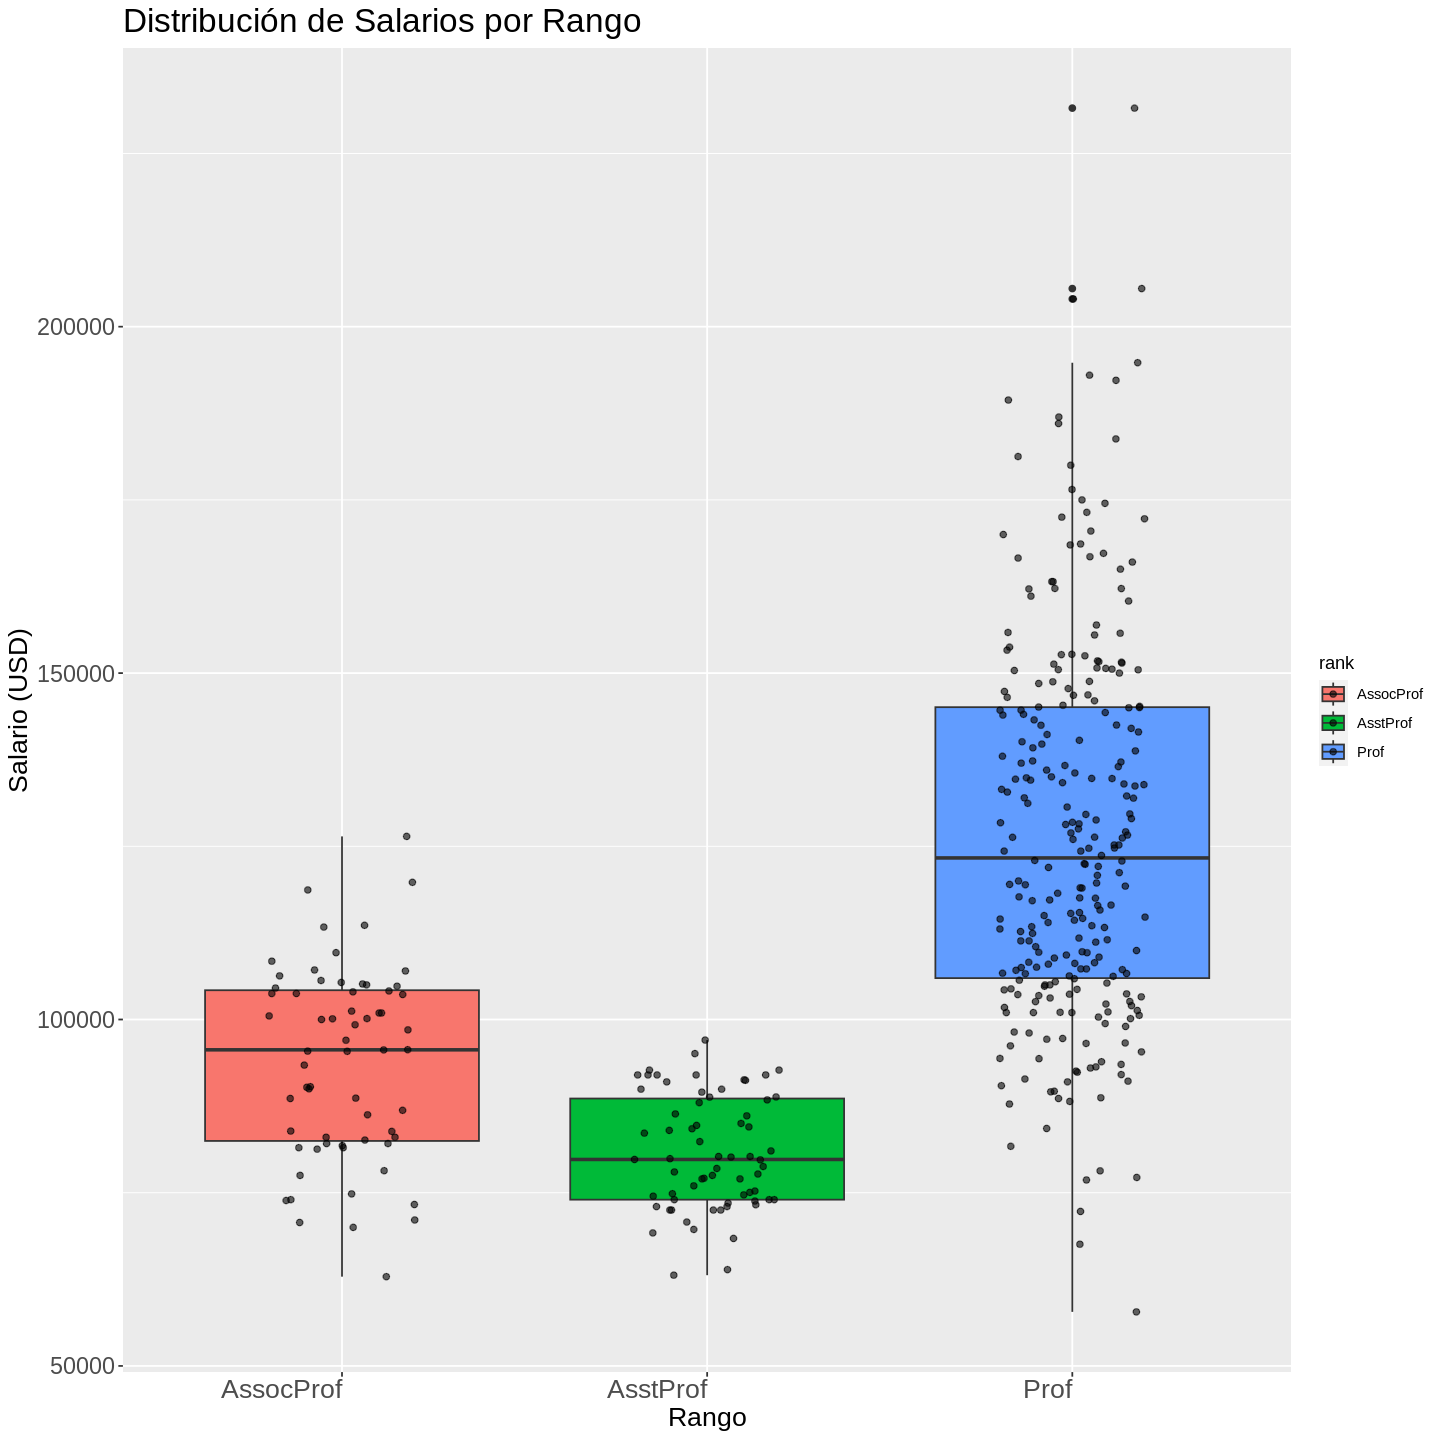

In [154]:
# Visualización de la distribución de salarios por rango
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(salaries, aes(x = rank, y = salary, fill = rank)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(width = 0.2, height = 0), alpha = 0.6, size = 1.5) +
  labs(title = "Distribución de Salarios por Rango", x = "Rango", y = "Salario (USD)") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

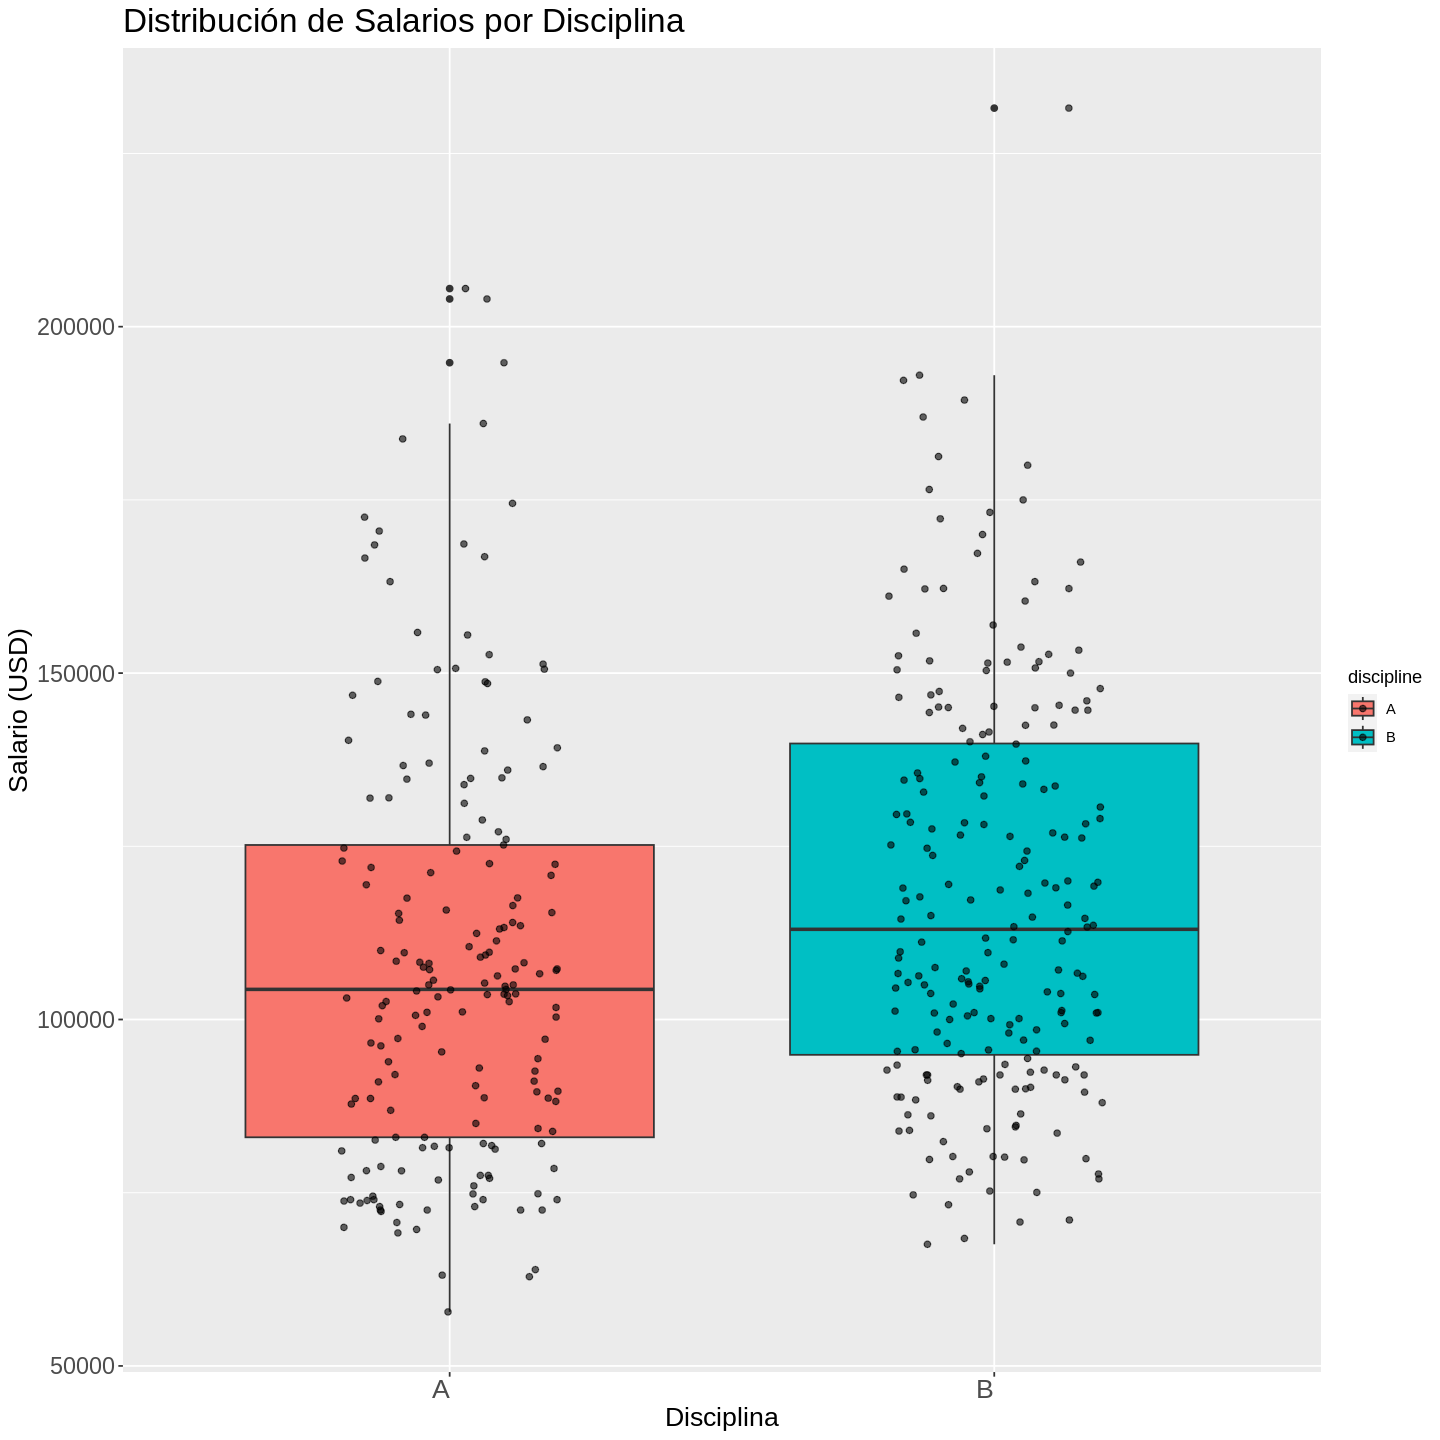

In [155]:
# Visualización de la distribución de salarios por disciplina

ggplot(salaries, aes(x = discipline, y = salary, fill = discipline)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(width = 0.2, height = 0), alpha = 0.6, size = 1.5) +
  labs(title = "Distribución de Salarios por Disciplina", x = "Disciplina", y = "Salario (USD)") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

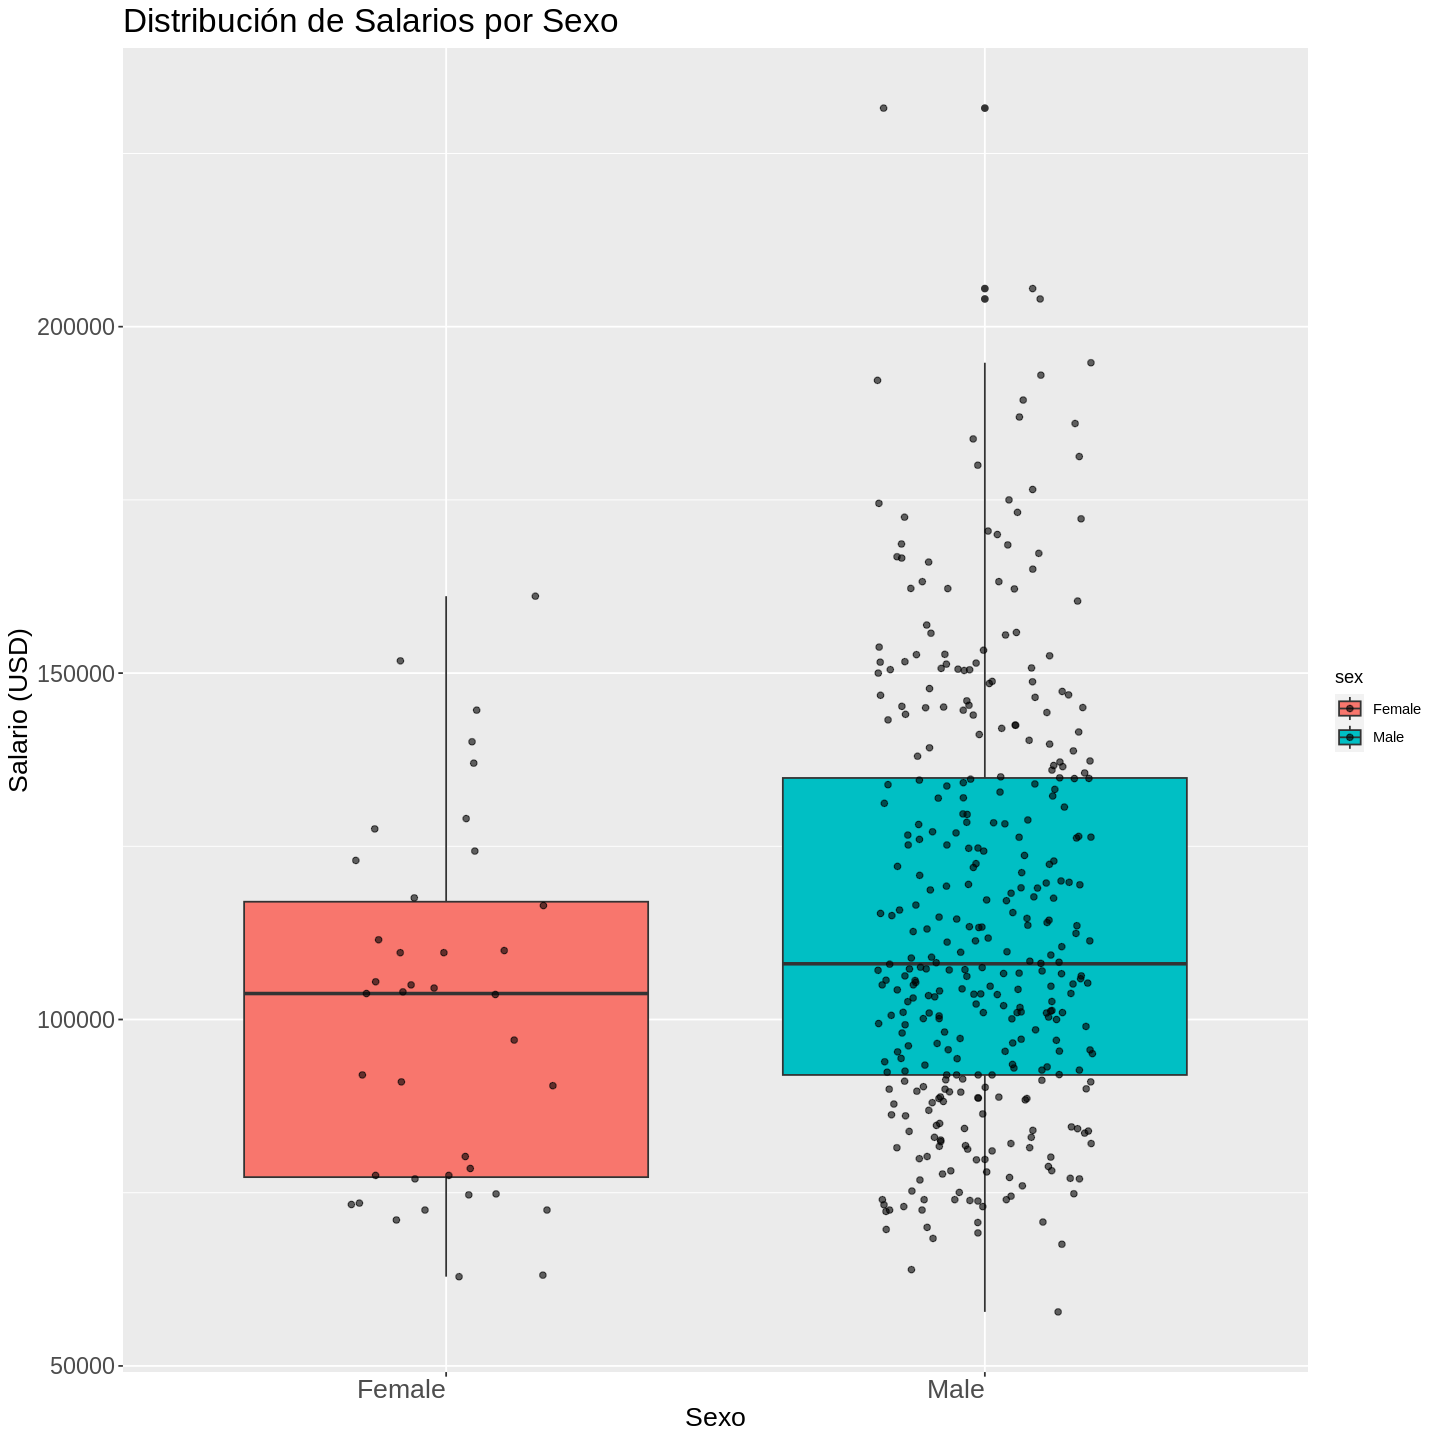

In [156]:
# Visualización de la distribución de salarios por sexo

ggplot(salaries, aes(x = sex, y = salary, fill = sex)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(width = 0.2, height = 0), alpha = 0.6, size = 1.5) +
  labs(title = "Distribución de Salarios por Sexo", x = "Sexo", y = "Salario (USD)") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

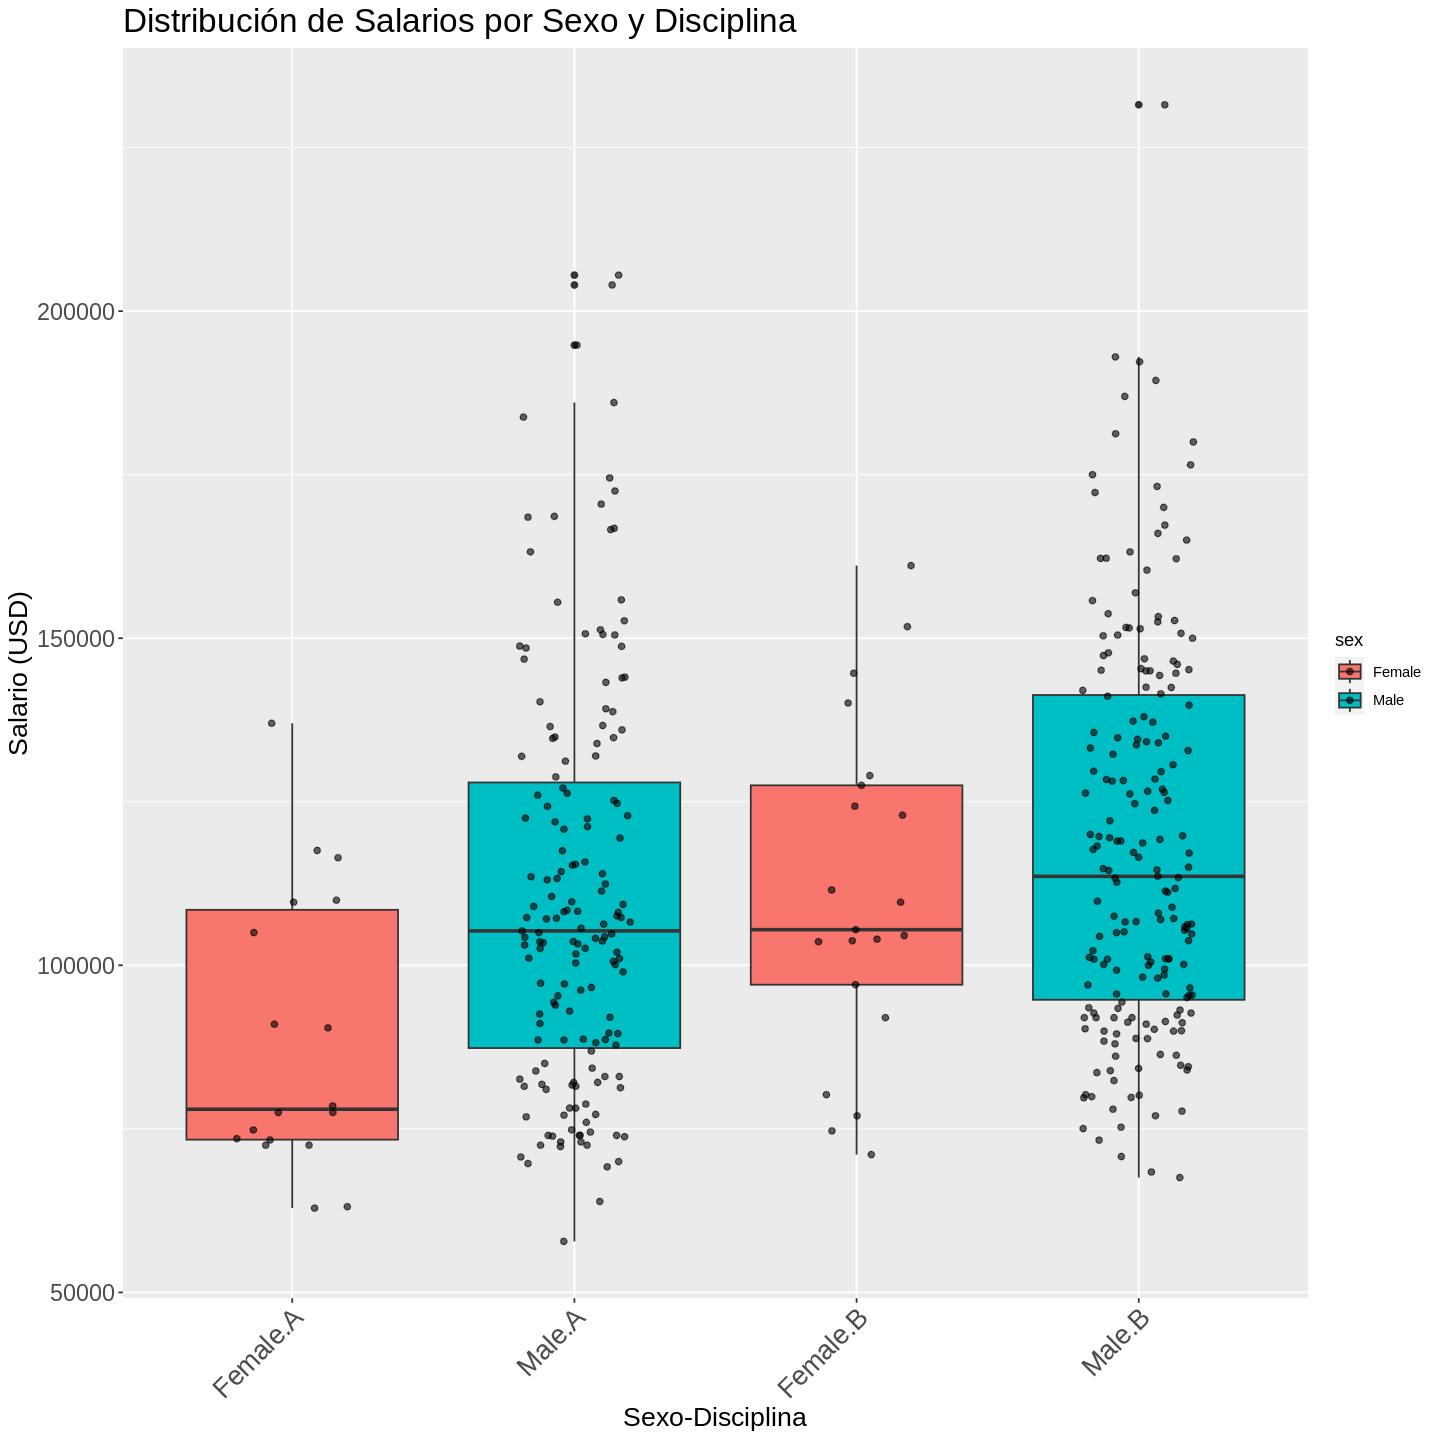

In [157]:
# Visualización de la distribución de salarios por sexo y disciplina

ggplot(salaries, aes(x = interaction(sex, discipline), y = salary, fill = sex)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(width = 0.2, height = 0), alpha = 0.6, size = 1.5) +
  labs(title = "Distribución de Salarios por Sexo y Disciplina", x = "Sexo-Disciplina", y = "Salario (USD)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

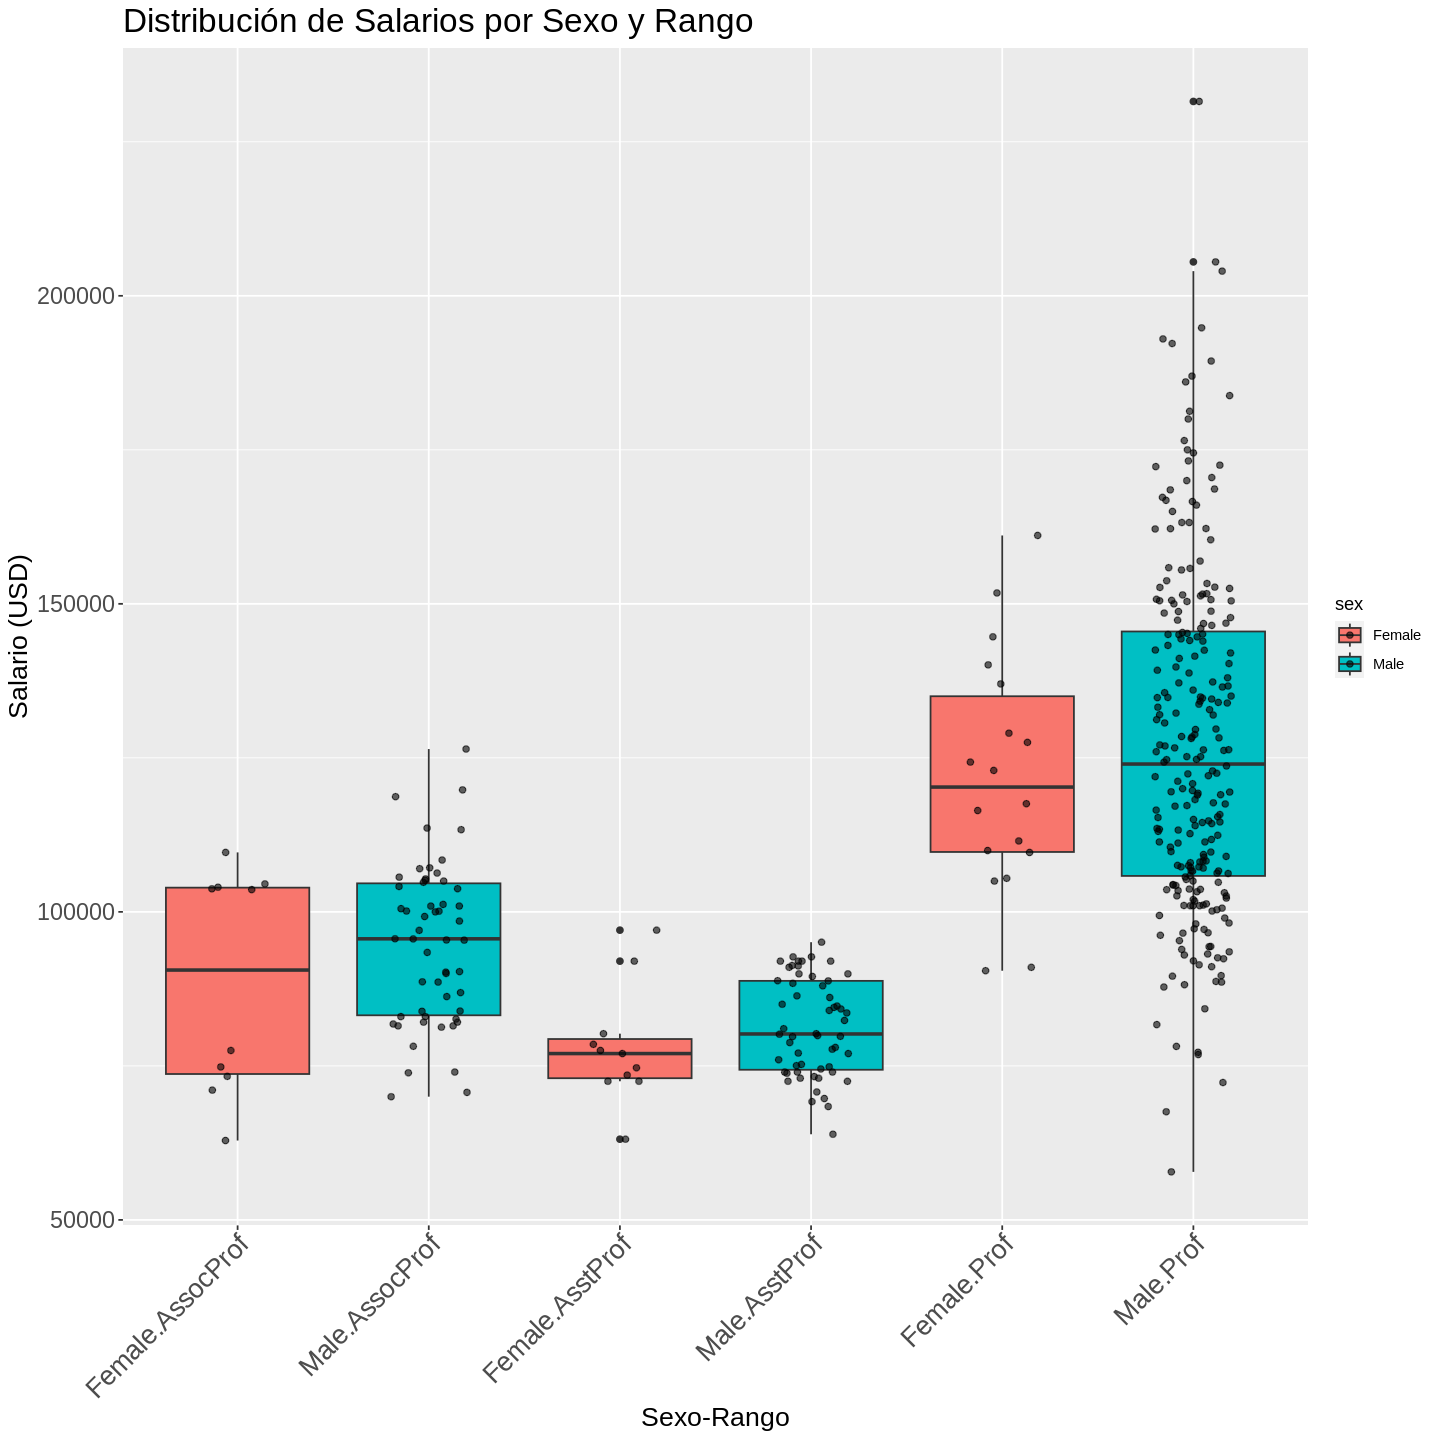

In [158]:
# Visualización de la distribución de salarios por sexo y rango

ggplot(salaries, aes(x = interaction(sex, rank), y = salary, fill = sex)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(width = 0.2, height = 0), alpha = 0.6, size = 1.5) +
  labs(title = "Distribución de Salarios por Sexo y Rango", x = "Sexo-Rango", y = "Salario (USD)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

Observaciones

**Gráficos - Distribución del Salario por Sexo y Disciplina**

* El promedio de los salarios de los hombres, es superior al de las mujeres en ambas disciplinas (A y B)
* Los salarios de las mujeres por disciplina, son más dispersos en comparación de la dispersión de datos de los hombres.
* Se presentan salarios atípicos (outliers) en el género masculino para ambas disciplinas.

**Gráficos - Distribución del Salario por Sexo y Rango**

* Se repite nuevamente que los promedios salariales del género masculino son superiores al de las mujeres en sus respectivos rangos (AssocProf, AsstProf, Prof)
* Se puede observar que los datos de los salarios de las mujeres se encuentran considerablemente dispersos para todos los rangos
* Para el rango Female.AsstProf se presentan una serie de datos atípicos por debajo y por encima de los bigotes. Este comportamiento de los datos permite plantear la existencia de una brecha salarial entre el mismo género femenino por rangos.

Continuamos graficando la distribución de **salary** en función de las variables numéricas.
* **yrs.since.phd**
* **yrs.service**

`geom_smooth()` using formula = 'y ~ x'


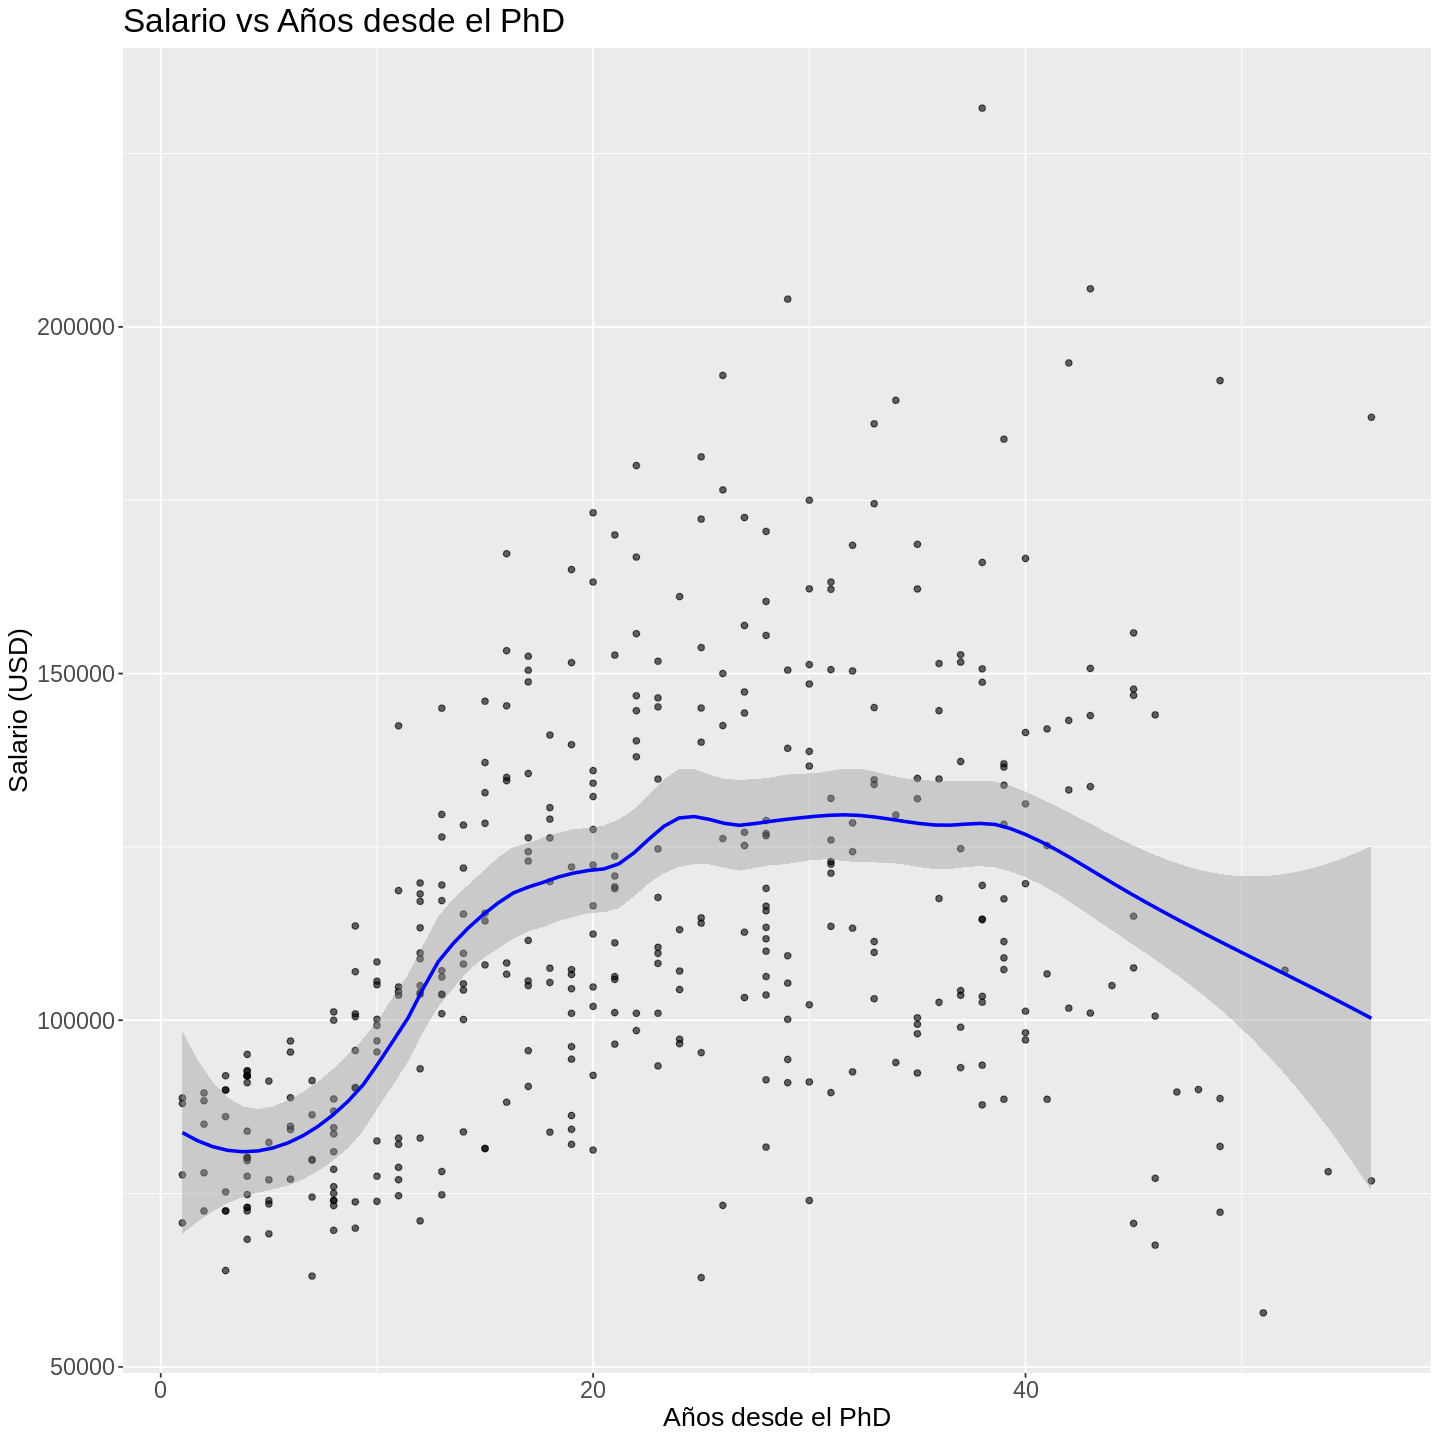

In [159]:
# Visualización de la distribución de salarios por años desde el PhD
ggplot(salaries, aes(x = yrs.since.phd, y = salary)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "loess", span = 0.4, col = "blue", se = TRUE) +
  labs(title = "Salario vs Años desde el PhD", x = "Años desde el PhD", y = "Salario (USD)") +
  theme(
    plot.title = element_text(size = 20),        # Title size
    axis.title.x = element_text(size = 16),      # X-axis title size
    axis.title.y = element_text(size = 16),      # Y-axis title size
    axis.text.x = element_text(size = 14),       # X-axis text size
    axis.text.y = element_text(size = 14)        # Y-axis text size
  )

`geom_smooth()` using formula = 'y ~ x'


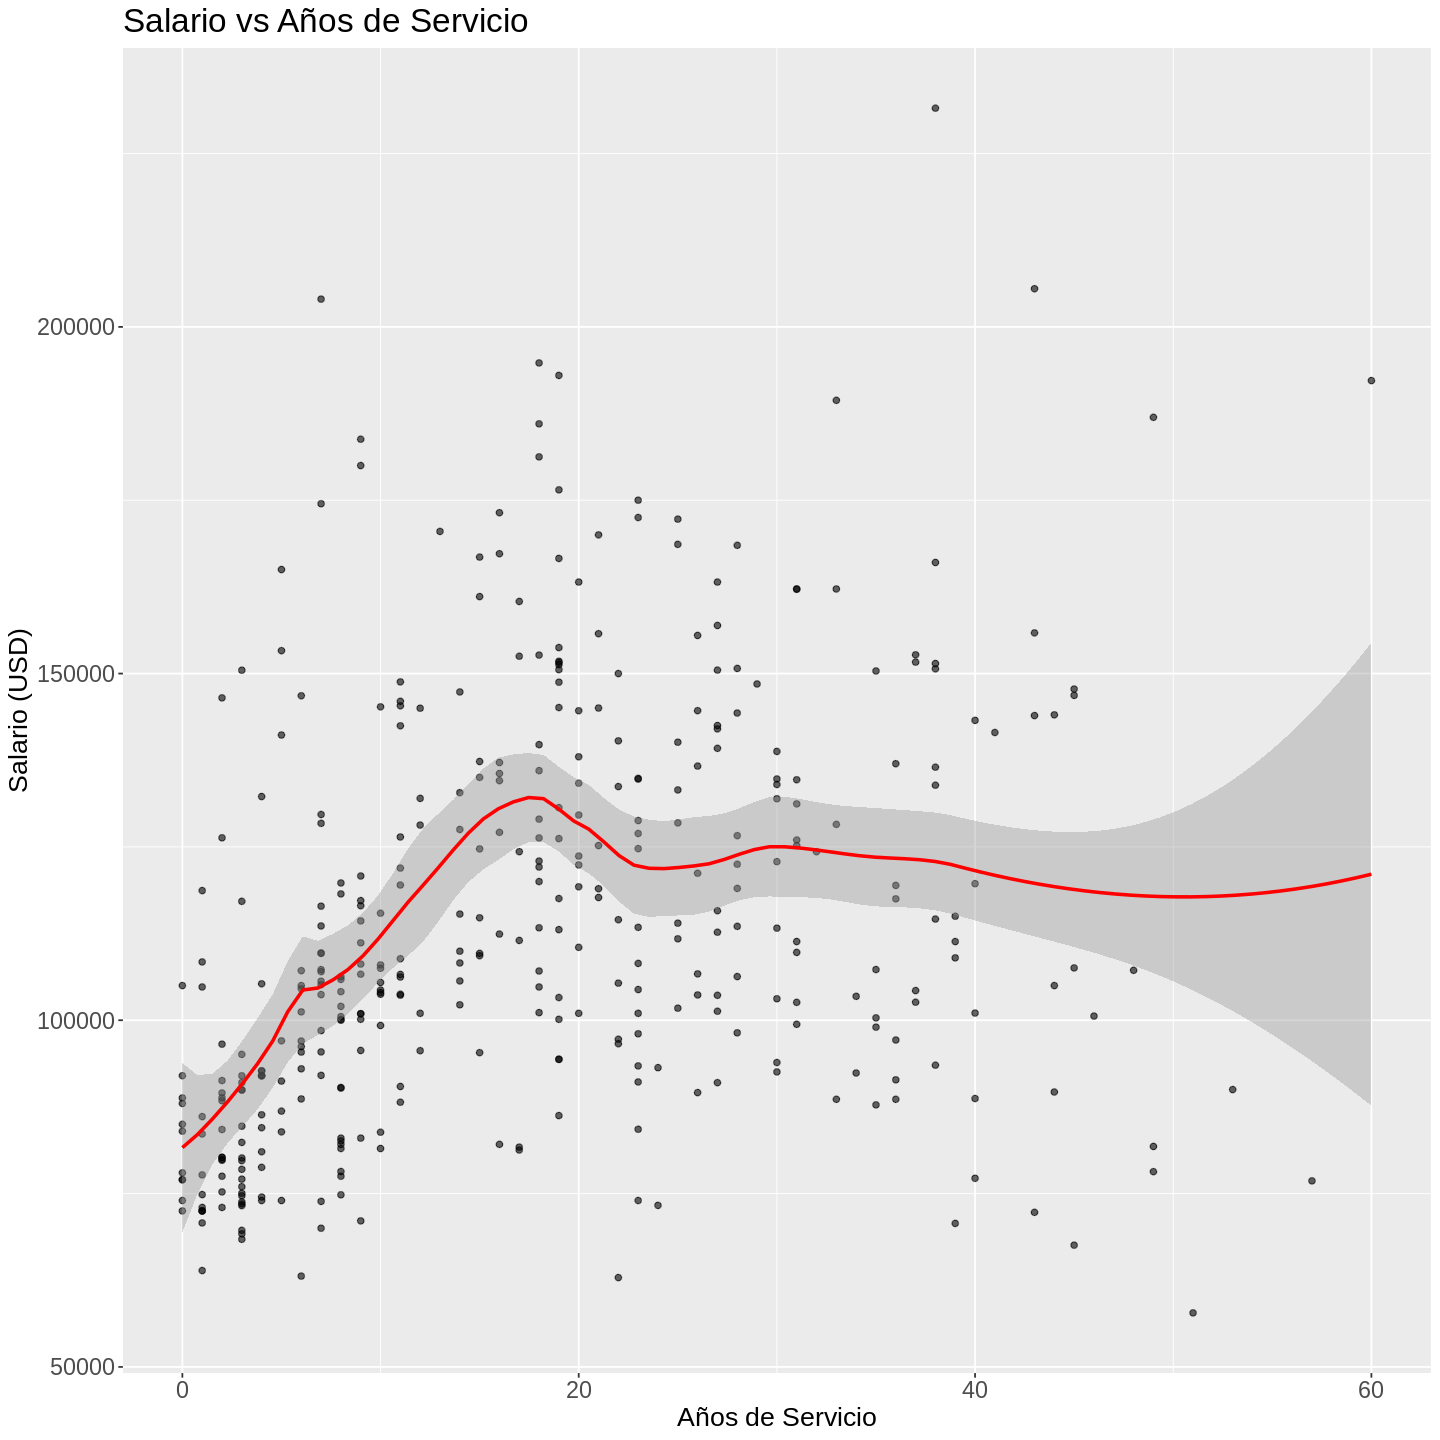

In [160]:
# Visualización de la distribución de salarios por años de servicio
ggplot(salaries, aes(x = yrs.service, y = salary)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "loess", span = 0.4, col = "red", se = TRUE) +
  labs(title = "Salario vs Años de Servicio", x = "Años de Servicio", y = "Salario (USD)") +
  theme(
    plot.title = element_text(size = 20),        # Title size
    axis.title.x = element_text(size = 16),      # X-axis title size
    axis.title.y = element_text(size = 16),      # Y-axis title size
    axis.text.x = element_text(size = 14),       # X-axis text size
    axis.text.y = element_text(size = 14)        # Y-axis text size
  )

Observaciones:

* Al evaluar las gráficas correspondientes a la distribución de salario con
respecto las variables Años desde haberse graduado del Doctorado y Años de servicio, se evidencia que hay una relación pero que no es muy clara o fuerte.

* Existe una gran dispersión de los datos a lo largo de todos los años de haberse graduado del Doctorado y años de servicio.

Las mejores variables para separar los datos serían las categóricas.

##2. ¿Podemos emplear un test paramétrico para determinar si las medias de salarios entre hombres y mujeres son las mismas o difieren? Ten en cuenta que, en tanto que se pide usar un test paramétrico, se deberá determinar si las muestras cumplen con las hipótesis necesarias.

Resumiendo un poco lo visto en la teoría de la asignatura:

**Definición:**

Los tests paramétricos suponen que los datos provienen de un tipo de distribución de probabilidad y hacen inferencias sobre los parámetros de la distribución (por ejemplo, media, varianza).

**Ejemplos de Tests Paramétricos:**

* Prueba t de Student: Utilizada para comparar las medias de dos grupos.
* ANOVA (Análisis de Varianza): Utilizada para comparar las medias entre tres o más grupos.
* Prueba Chi-cuadrado: Utilizada para datos categóricos para evaluar la probabilidad de que una distribución observada se deba al azar.

**Hipótesis necesarias:**

* Los datos deben estar aproximadamente distribuidos de manera normal.
* Las muestras deben tener varianzas similares.
* Los datos deben ser independientes e idénticamente distribuidos.

In [161]:
# Instalación de paquetes necesarios
#suppressWarnings(suppressMessages({
# install.packages("car")
#}))

In [162]:
# Cargar las librerias necesarias
#suppressWarnings(suppressPackageStartupMessages({
#  library(car)  # Para el test de homogeneidad de varianzas
#  library(MASS) # Para el test de normalidad
#}))

In [163]:
# Agrupamos y damos la media y desviación típica según cada factor.
meansd <- function(x) c(media = mean(x), desviacion_estandar = sd(x))

# Calcular la media y la desviación estándar de los salarios por sexo
resultados <- by(salaries$salary, salaries$sex, FUN = meansd)

# Mostrar los resultados
resultados

salaries$sex: Female
              media desviacion_estandar 
          101002.41            25952.13 
------------------------------------------------------------ 
salaries$sex: Male
              media desviacion_estandar 
          115090.42            30436.93 

In [164]:
 # Test one-wey ANOVA asumiendo varianzas distintas concluye que no tienen medias iguales
oneway.test(salaries$salary ~ salaries$sex)


	One-way analysis of means (not assuming equal variances)

data:  salaries$salary and salaries$sex
F = 9.9949, num df = 1.000, denom df = 50.122, p-value = 0.002664


In [165]:
 # Test one-wey ANOVA asumiendo varianzas iguales concluye que no tienen medias iguales
oneway.test(salaries$salary ~ salaries$sex, var.equal=TRUE)


	One-way analysis of means

data:  salaries$salary and salaries$sex
F = 7.7377, num df = 1, denom df = 395, p-value = 0.005667


Con las dos variantes se obtiene un p-valor menor a 0.05 por lo que se rechaza la hipótesis nula H0 de igualdad de medias a lo largo de las muestras, y se acepta la hipótesis alternativa H1 de que las medias de las muestras varían.

In [166]:
# Test t de student asumiendo varianzas distintas concluye que no tienen medias iguales
t_test <- t.test(salary ~ sex, data = salaries)

# Mostrar resultados del test t de Student
t_test


	Welch Two Sample t-test

data:  salary by sex
t = -3.1615, df = 50.122, p-value = 0.002664
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -23037.916  -5138.102
sample estimates:
mean in group Female   mean in group Male 
            101002.4             115090.4 


**Empleando el test t de Student** con el siguiente comando obtenemos un p-valor muy pequeño. En consecuencia la hipótesis nula de que la media es 0 queda rechazada. Además nos da un intervalo de confianza al 95 sobre el parámetro de la media muestral.

El contraste de hipótesis de si la media de los sexos es 0, se formaliza como:

* Hipótesis nula: mu=0

* Hipótesis alternativa: mu<>0

##3. Divide el dataset tomando las primeras 317 instancias como train y las últimas 80 como test. Entrena un modelo de regresión lineal con regularización Ridge y Lasso en train seleccionando el que mejor MSE tenga. Da las métricas en test. Valora el uso del One Hot Encoder, en caso de emplearlo arguméntalo.

Para llevar a cabo esta tarea, se siguen los siguientes pasos:
1. Técnica One Hot Encoder: Técnica que convierte cada categoría en una columna. Esto es útil para preparar los datos para algoritmos de modelado que no pueden manejar directamente variables categóricas.

2. División del dataset: Separaremos el dataset en un conjunto de entrenamiento (train) y uno de prueba (test).

3. Entrenamiento de modelos de regresión lineal con regularización Ridge y Lasso: Entrenaremos ambos modelos en el conjunto de entrenamiento.

4. Selección del mejor modelo: Seleccionaremos el modelo con el menor MSE en el conjunto de entrenamiento.

5. Evaluación del modelo en el conjunto de prueba: Calcularemos las métricas de evaluación en el conjunto de prueba.

In [167]:
# Instalación de paquetes
suppressWarnings(suppressMessages({
  #install.packages("glmnet")
  install.packages("caret")
}))

In [168]:
# Cargar las librerias necesarias
suppressWarnings(suppressPackageStartupMessages({
  library(glmnet)
  library(caret)
}))

In [169]:
# Tecnica One Hot Encoding sobre las variables categóricas
# Se usa caret para realizarlo

# model.matrix: No se utiliza esta opción porque omite la categoría de referencia por defecto (Ej: Para sex, toma sexMale = 1. Si es female, se entiende que es 0).
# Tenemos casos de variables categoricas con más de dos opciones. Elijo otra forma de hacerlo.

# Crear el objeto dummyVars
dummies <- dummyVars(~ ., data = salaries)

# Aplicar la transformación
datOHE <- predict(dummies, newdata = salaries)

head(datOHE)
dim(datOHE)


,rank.AssocProf,rank.AsstProf,rank.Prof,discipline.A,discipline.B,yrs.since.phd,yrs.service,sex.Female,sex.Male,salary
1,0,0,1,0,1,19,18,0,1,139750
2,0,0,1,0,1,20,16,0,1,173200
3,0,1,0,0,1,4,3,0,1,79750
4,0,0,1,0,1,45,39,0,1,115000
5,0,0,1,0,1,40,41,0,1,141500
6,1,0,0,0,1,6,6,0,1,97000


[1] 397  10

In [170]:
# División del dataset en train y test
train_data <- datOHE[1:317, ]
test_data <- datOHE[318:nrow(datOHE), ]

dim(train_data)
dim(test_data)

[1] 317  10

[1] 80 10

Pasamos un modelo Ridge y otro Lasso viendo rendimientos

Para ello primero creamos la separación X_train/y_train y X_test/y_test

In [171]:
# Preparar los datos para glmnet
X_train <- data.matrix(train_data)
y_train <- data.matrix(salaries[1:317,]$salary)

X_test <- data.matrix(test_data)
y_test <- data.matrix(salaries[318:nrow(salaries), ]$salary)

**Modelo Ridge en Regresión Lineal**

Ajustamos un modelo de Ridge de regresión lineal, para ello:
* alpha = 0
* family = 'gaussian'
* type.measure = 'mse'

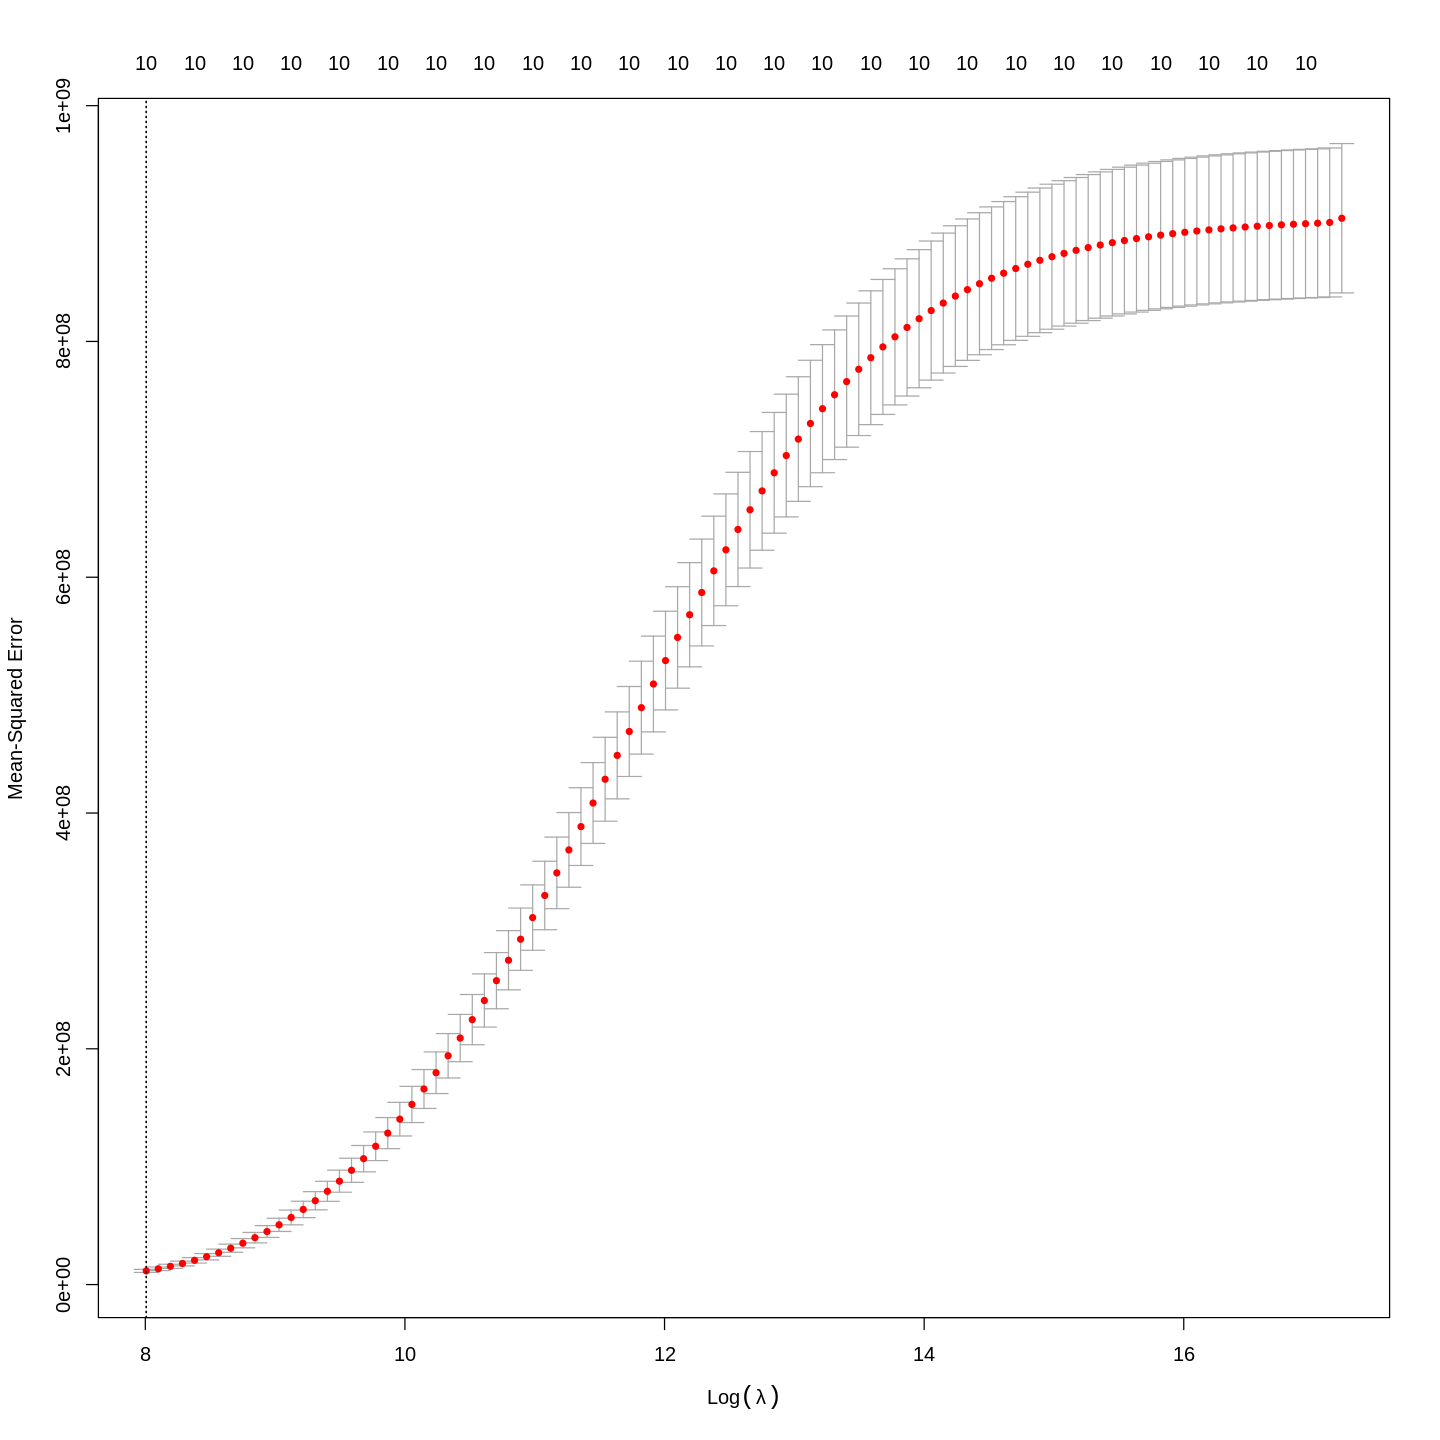

In [172]:
# Modelo Ridge
set.seed(42)
cv.ridge <- cv.glmnet(X_train, y_train, family='gaussian', alpha=0, type.measure='mse')
plot(cv.ridge)

In [173]:
# Mejor valor de lambda
cv.ridge$lambda.min

[1] 3001.896

In [174]:
# Error que se estima lambda mínimo dado en MSE
min(cv.ridge$cvm)

[1] 11597212

In [175]:
# Coeficiones para el valor de λ óptimo
coef(cv.ridge, s=cv.ridge$lambda.min)

11 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    15266.2574129
rank.AssocProf -1518.4113623
rank.AsstProf  -3342.4820417
rank.Prof       3303.4144244
discipline.A   -1073.0177394
discipline.B    1137.1174182
yrs.since.phd     49.6961050
yrs.service      -52.1836862
sex.Female      -302.7565119
sex.Male         323.6244139
salary             0.8469061

**Modelo Lasso en Regresión Lineal**

Ajustamos un modelo de Ridge de regresión lineal, para ello:
* alpha = 1
* family = 'gaussian'
* type.measure = 'mse'

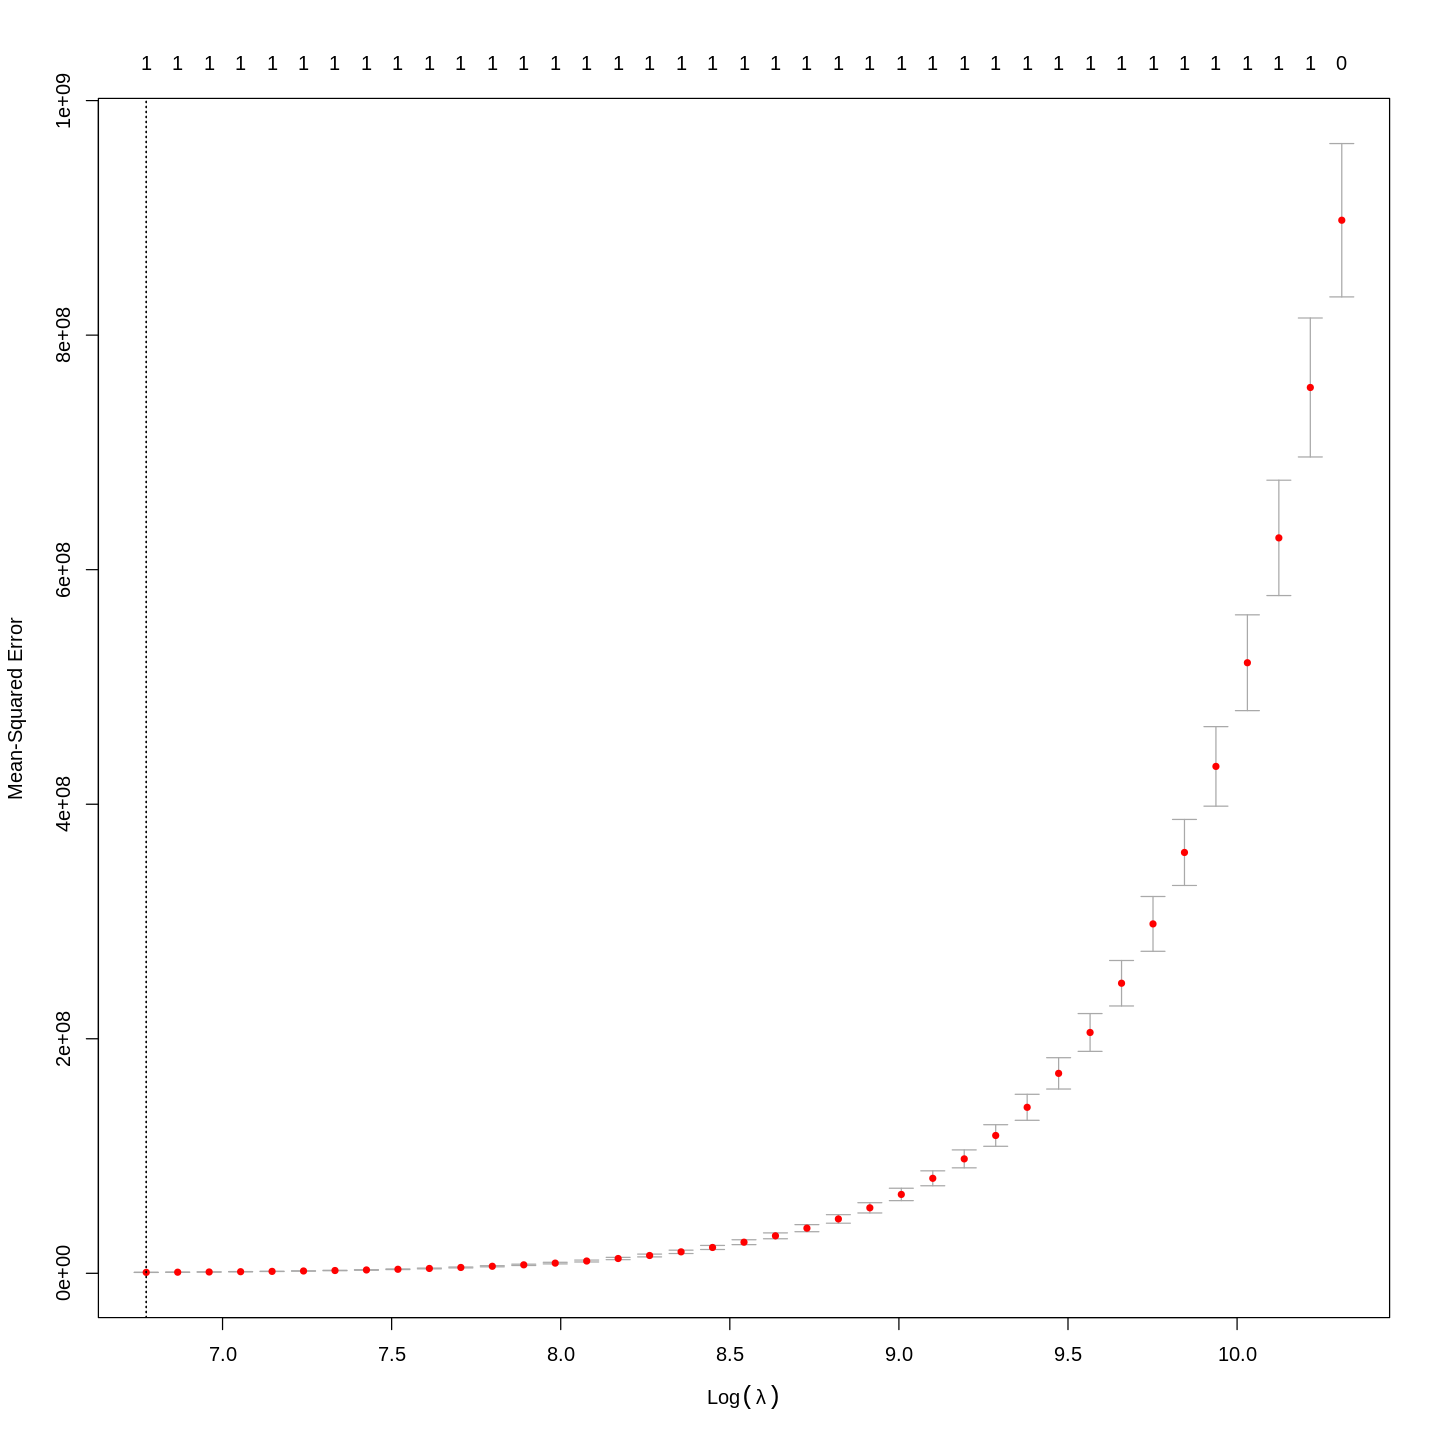

In [176]:
# Modelo Lasso
set.seed(42)
cv.lasso <- cv.glmnet(X_train, y_train, family='gaussian', alpha=1, type.measure='mse')
plot(cv.lasso)

In [177]:
# Mejor valor de lambda
cv.lasso$lambda.min

[1] 875.0687

In [178]:
# Error que se estima para lambda mínimo dado en MSE
min(cv.lasso$cvm)

[1] 778836.5

In [179]:
# Coeficiones para el valor de λ óptimo
coef(cv.lasso, s=cv.lasso$lambda.min)

11 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)    3257.1127458
rank.AssocProf    .        
rank.AsstProf     .        
rank.Prof         .        
discipline.A      .        
discipline.B      .        
yrs.since.phd     .        
yrs.service       .        
sex.Female        .        
sex.Male          .        
salary            0.9708495

Observamos que ha establecido a todas las variables como nulos directamente, salvo salary, que es la variable a predecir.

**Predicciones en el conjunto de entrenamiento**

In [180]:
# Predicción Ridge
ridge_train_pred <- predict.glmnet(cv.ridge$glmnet.fit, newx=X_train, s=cv.ridge$lambda.min)
head(ridge_train_pred)

,s1
1,138390.46
2,166873.53
3,80967.51
4,117625.77
5,139715.94
6,97343.55


In [181]:
# Predicción Lasso
lasso_train_pred <- predict.glmnet(cv.lasso$glmnet.fit, newx=X_train, s=cv.lasso$lambda.min)
head(lasso_train_pred)

,s1
1,138933.33
2,171408.24
3,80682.36
4,114904.80
5,140632.31
6,97429.51


In [182]:
# Calcular el MSE en el conjunto de entrenamiento
ridge_train_mse <- mean((ridge_train_pred - y_train)^2)
lasso_train_mse <- mean((lasso_train_pred - y_train)^2)

ridge_train_mse
lasso_train_mse

[1] 11069543

[1] 765745.2

In [183]:
# Seleccionar el mejor modelo basado en el MSE del conjunto de entrenamiento
best_model <- ifelse(ridge_train_mse < lasso_train_mse, "Ridge", "Lasso")
best_model

[1] "Lasso"

**Predicciones en el conjunto de test**

In [184]:
# Predicción Ridge
ridge_test_pred <- predict.glmnet(cv.ridge$glmnet.fit, newx=X_test, s=cv.ridge$lambda.min)
head(ridge_test_pred)

,s1
318,77184.30
319,133941.83
320,134397.98
321,108463.60
322,96185.99
323,122355.80


In [185]:
# Predicción Lasso
lasso_test_pred <- predict.glmnet(cv.lasso$glmnet.fit, newx=X_test, s=cv.lasso$lambda.min)
head(lasso_test_pred)

,s1
318,68846.73
319,133884.91
320,134348.00
321,104640.98
322,96111.10
323,126002.58


In [186]:
# Calcular el MSE en el conjunto de prueba
ridge_test_mse <- mean((ridge_test_pred - y_test)^2)
lasso_test_mse <- mean((lasso_test_pred - y_test)^2)

ridge_test_mse
lasso_test_mse

[1] 14642498

[1] 841086.5

In [187]:
# Seleccionar el mejor modelo basado en el MSE del conjunto de prueba
best_model <- ifelse(ridge_test_mse < lasso_test_mse, "Ridge", "Lasso")
best_model

[1] "Lasso"

##4. Estudia la normalidad de los residuos del modelo resultante, ¿detectas algún sesgo?


Para estudiar la normalidad de los residuos, se realizarán los siguientes pasos:

1. Obtener los residuos del modelo.
2. Visualizar la distribución de los residuos con un histograma.
3. Realizar un gráfico Q-Q (quantile-quantile) para comparar los residuos con una distribución normal.
4. Realizar una prueba de Shapiro-Wilk para comprobar la normalidad de los residuos.

In [188]:
# Calcular los residuos del mejor modelo en el conjunto de prueba
residuals <- y_test - lasso_test_pred

# Convertir los residuos a un dataframe
residuals_df <- data.frame(residuals)

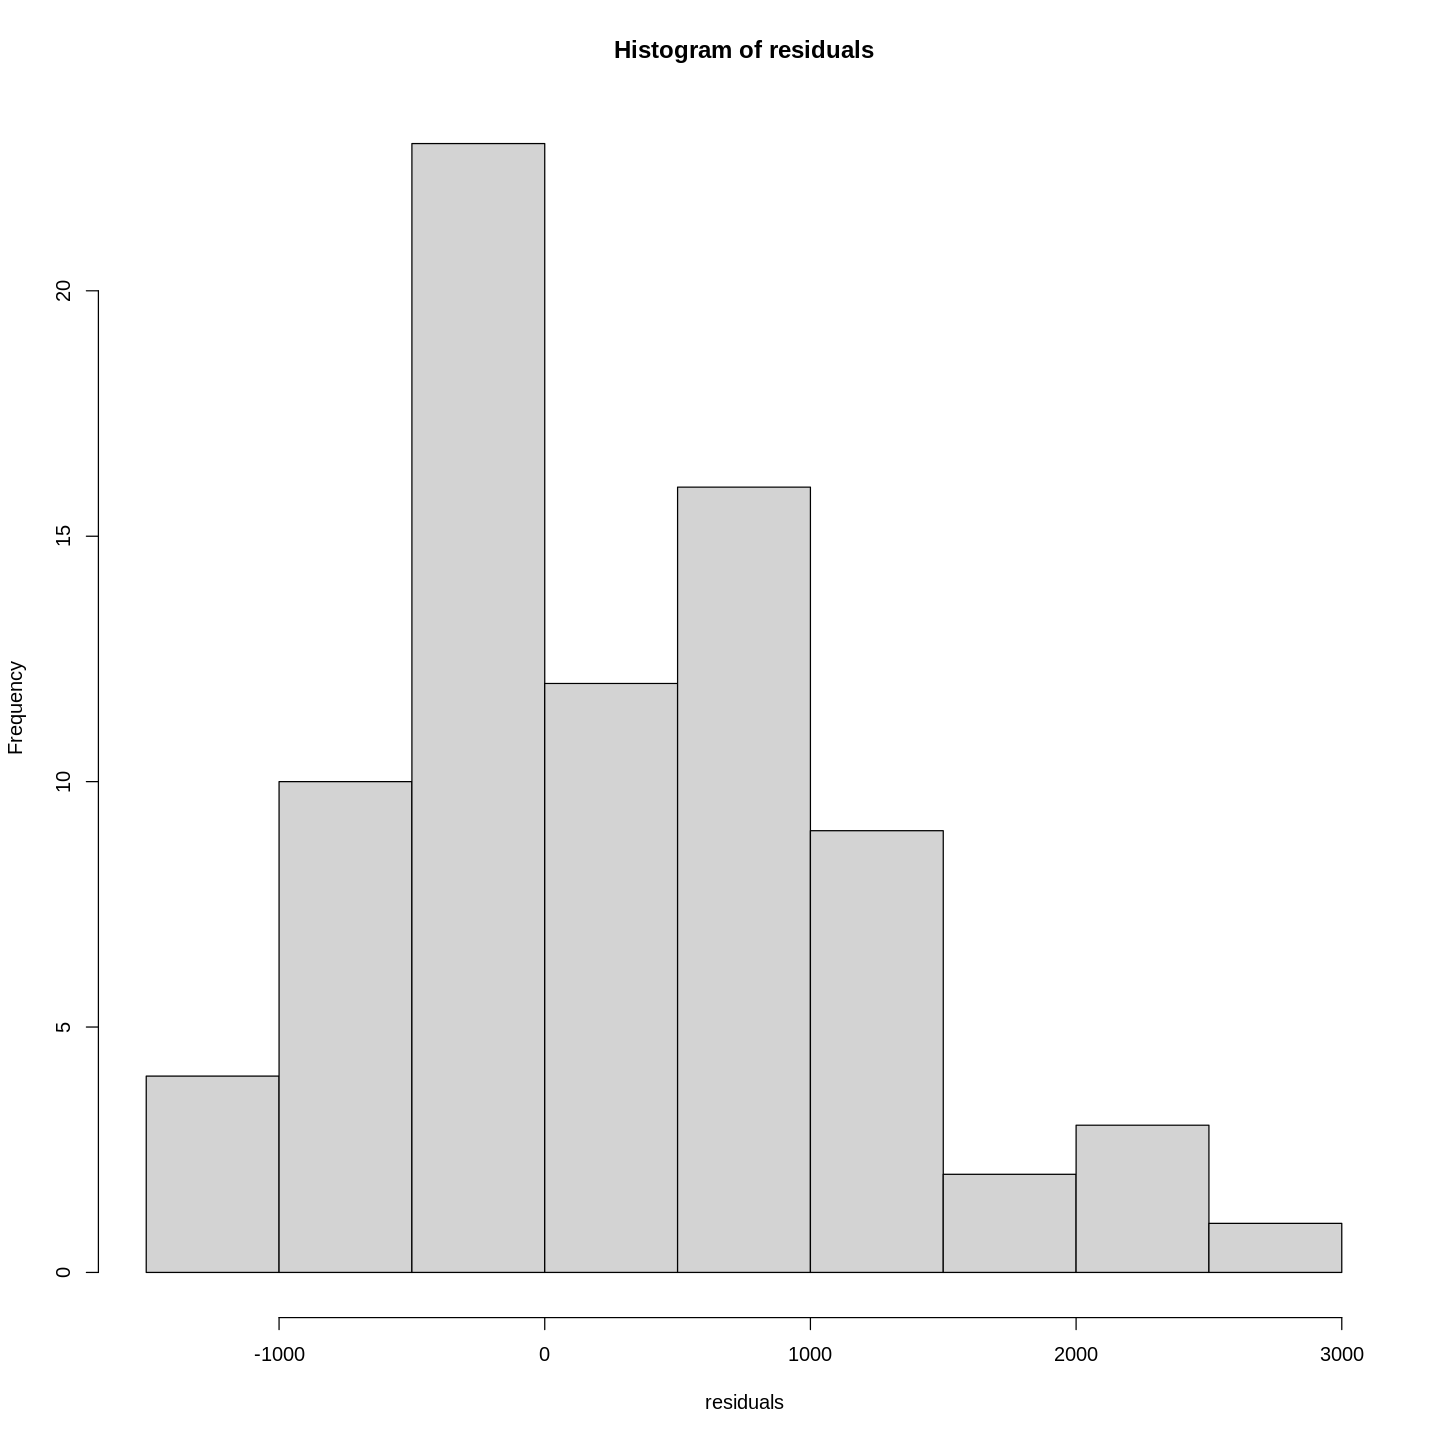

In [189]:
hist(residuals)

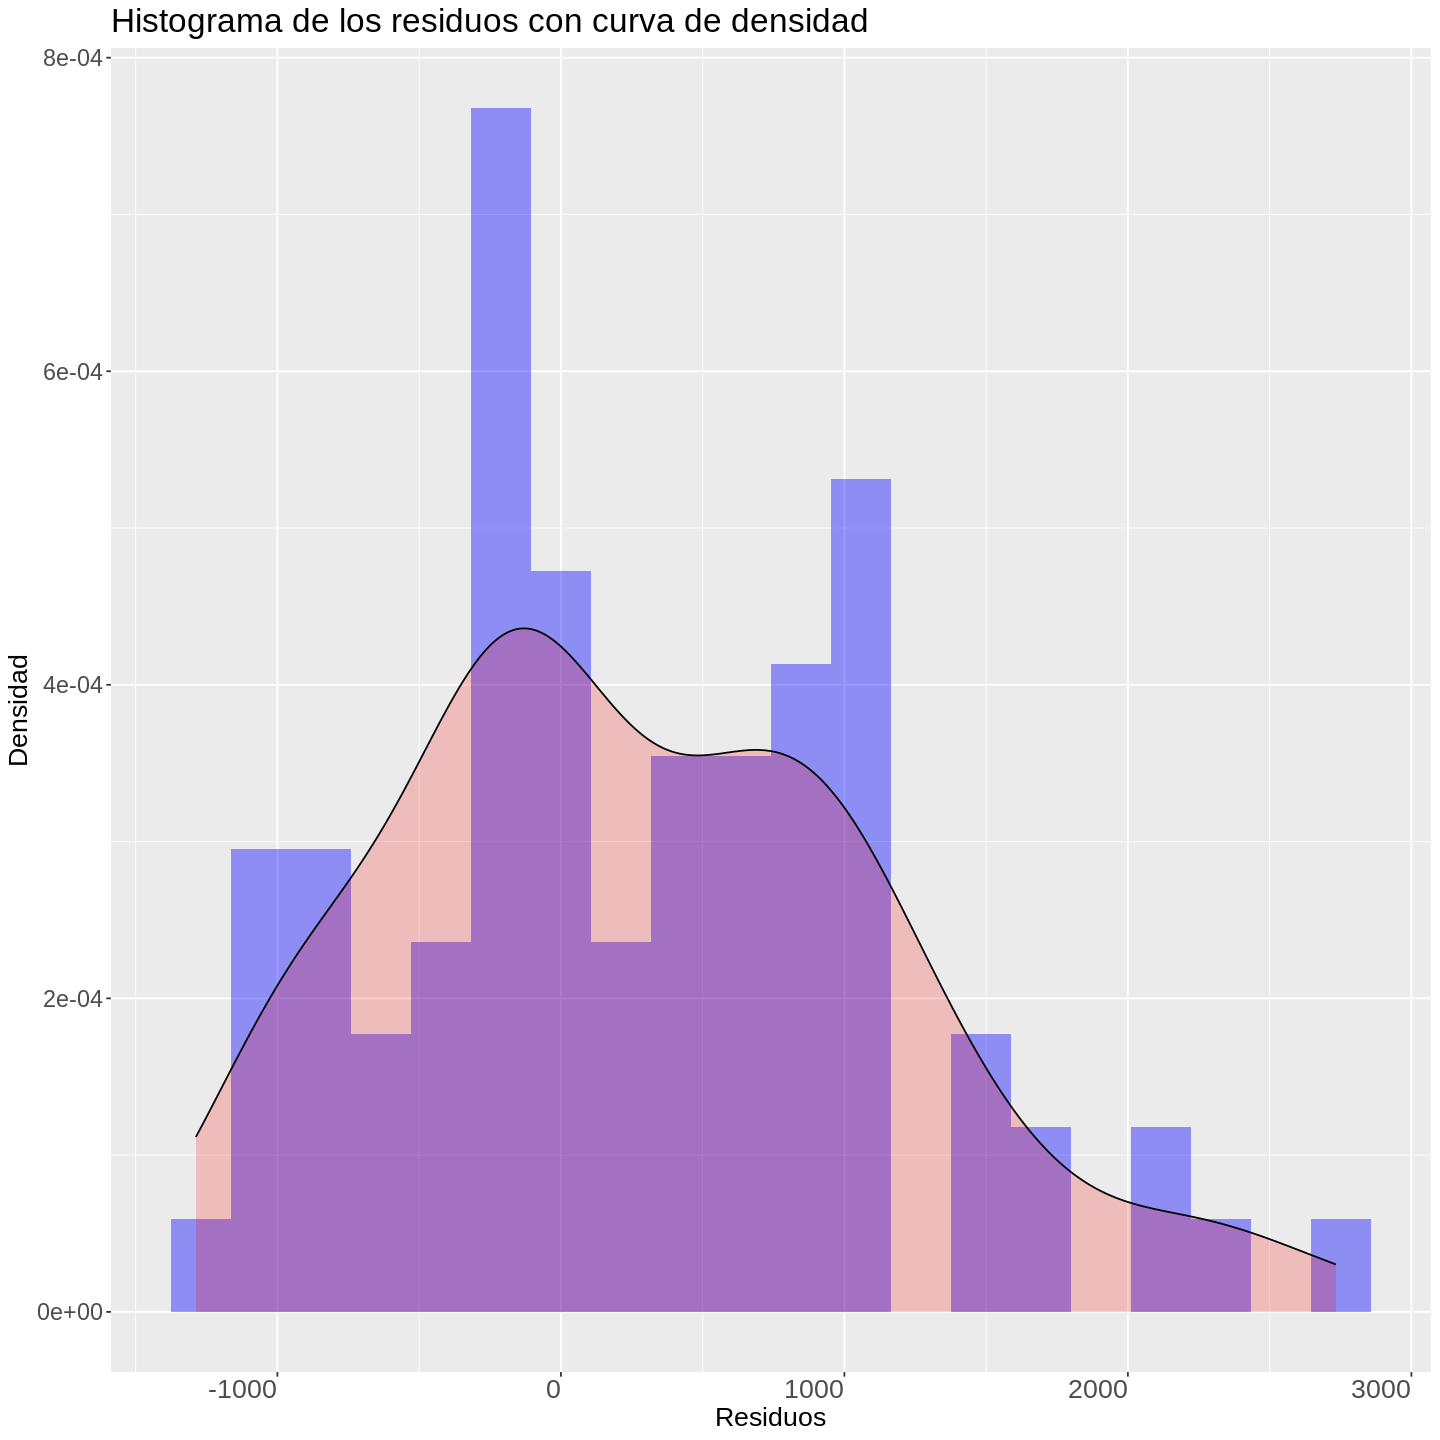

In [190]:
# Crear el histograma con la curva de densidad usando ggplot2
library(ggplot2)
ggplot(residuals_df, aes(x = residuals)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "blue", alpha = 0.4) +
  geom_density(alpha = 0.2, fill = "red") +
  labs(title = "Histograma de los residuos con curva de densidad", x = "Residuos", y = "Densidad") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size=16),
        plot.title = element_text(size = 20),        # Tamaño del título
        axis.title.x = element_text(size = 16),      # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),      # Tamaño del título del eje Y
        axis.text.y = element_text(size = 14)        # Tamaño del texto del eje Y
)

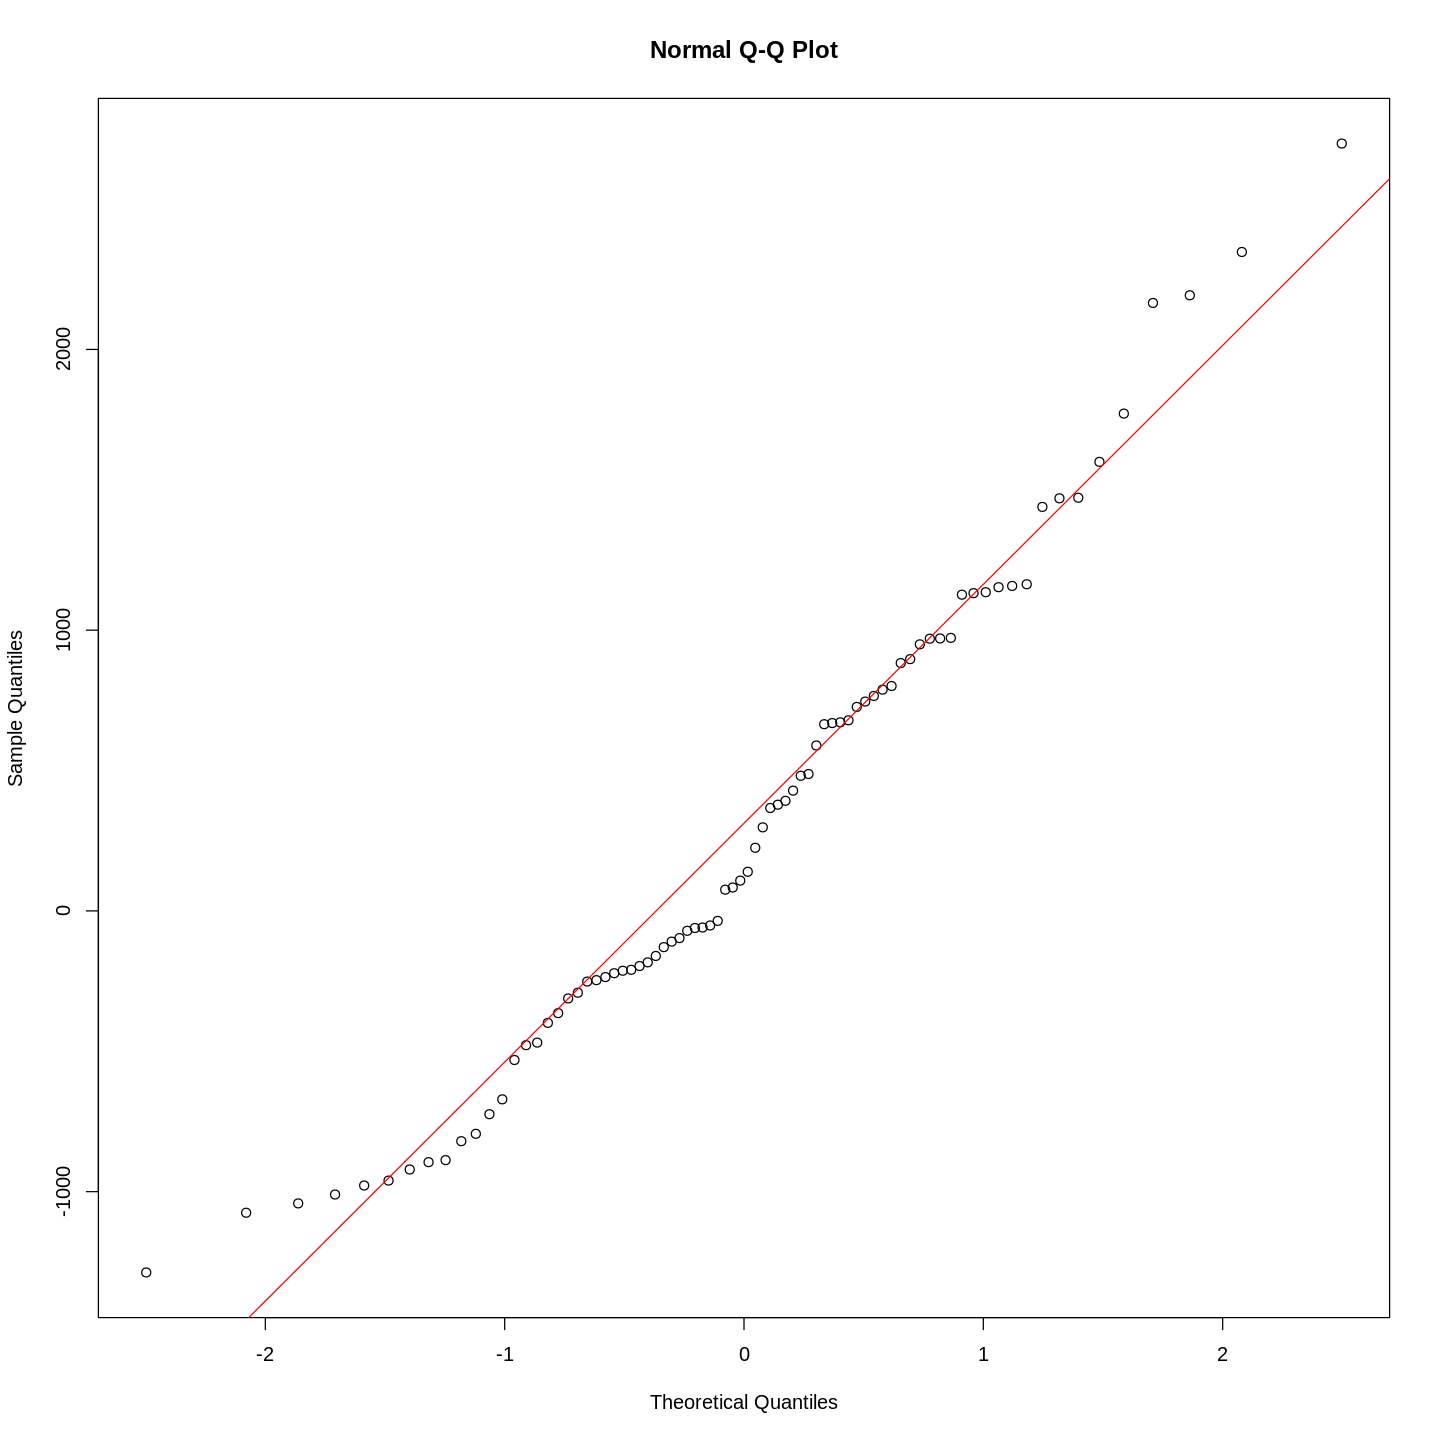

In [191]:
# Gráfico QQ: contrastando la distribución de la muestra de los residuos con una distribución normal
qqnorm(residuals)
qqline(residuals, col = "red")

In [192]:
# Prueba de Shapiro-Wilk para normalidad
shapiro_test_residuals <- shapiro.test(residuals)
shapiro_test_residuals


	Shapiro-Wilk normality test

data:  residuals
W = 0.97155, p-value = 0.07126


Realizamos también un test no paramétrico que mide la normalidad: el test de Shapito-Wilk cuya hipótesis nula recordemos que es que la muestra proviene de una población con una distribución que se puede aproximar por una normal.

Como el p-valor es mayor de 0.05, se acepta la hipótesis nula y podemos aceptar normalidad en los residuos.

##5. ¿Qué conclusiones extraes de este estudio y del modelo implementado? ¿Consideras correcto el rendimiento del mismo?

Las conclusiones se extraen evaluando las métricas de rendimiento del modelo en el conjunto de prueba, así como la normalidad de los residuos.
Por lo tanto:

In [194]:
# Mostrar los resultados del mejor modelo y del test de Shapiro-Wilk
list(
  best_model = best_model,
  lasso_train_mse = lasso_train_mse,
  lasso_test_mse = lasso_test_mse,
  shapiro_test_p_value = shapiro_test_residuals$p.value
)

# Conclusiones
if (shapiro_test_residuals$p.value > 0.05) {
  normality_conclusion <- "Los residuos siguen una distribución normal."
} else {
  normality_conclusion <- "Los residuos no siguen una distribución normal, lo que indica un posible sesgo."
}

conclusion <- paste(
  "El modelo seleccionado fue el", best_model,
  "con un MSE de", round(lasso_test_mse, 2), "en el conjunto de prueba.",
  normality_conclusion,
  sep = "\n"
)

cat(conclusion)

$best_model
[1] "Lasso"

$lasso_train_mse
[1] 765745.2

$lasso_test_mse
[1] 841086.5

$shapiro_test_p_value
[1] 0.07125861

El modelo seleccionado fue el
Lasso
con un MSE de
841086.45
en el conjunto de prueba.
Los residuos siguen una distribución normal.